In [1]:
# This cell mounts your Google Drive to the Colab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Define a path in your Google Drive for your projects
# This keeps things organized
PROJECT_PATH = "/content/drive/MyDrive/Colab_Projects/"
%mkdir -p "{PROJECT_PATH}"
%cd "{PROJECT_PATH}"

# Now, clone the repository INSIDE your Google Drive project folder
!git clone https://github.com/RUCAIBox/Language-Specific-Neurons.git

# Change directory into the cloned project
%cd Language-Specific-Neurons

# Now, install the dependencies
!pip install datasets
!pip install torch


/content/drive/MyDrive/Colab_Projects
fatal: destination path 'Language-Specific-Neurons' already exists and is not an empty directory.
/content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons


In [3]:
# The old version (0.2.7) is incompatible with Colab's modern environment.
# Let's install the latest version of vLLM, which is built to work with it.
!pip install vllm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.2/438.2 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.0/180.0 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 

In [1]:
import os
from datasets import load_dataset
from transformers import AutoTokenizer
from huggingface_hub import notebook_login
from tqdm.auto import tqdm

# --- Step 1: Login to Hugging Face ---
# A login box will appear. Paste your Hugging Face access token here.
# Get a token at: https://huggingface.co/settings/tokens
print("Please log in to your Hugging Face account.")
notebook_login()


Please log in to your Hugging Face account.


In [7]:
import os
from datasets import load_dataset
from transformers import AutoTokenizer
from tqdm import tqdm

# --- Step 2: Configuration ---
PROJECT_PATH = "/content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/"
OUTPUT_DIR = os.path.join(PROJECT_PATH, "data")
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ✅ Use small token target for testing
TARGET_TOKEN_COUNT = 50_000  # only ~50k tokens (tiny test)
MODEL_NAME = "meta-llama/Llama-3.2-1B"
LANGUAGES = ['en', 'hi']
CONFIG_DATE = '20231101'

print(f"Output directory for text files: {OUTPUT_DIR}")

# --- Step 3: Load the Tokenizer ---
print(f"Loading tokenizer for '{MODEL_NAME}'...")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_auth_token=True)
print("Tokenizer loaded successfully.")

# --- Step 4: Process each language ---
for lang in LANGUAGES:
    print("\n" + "=" * 50)
    print(f"Processing language: {lang}")
    print("=" * 50)

    collected_documents = []
    current_token_count = 0

    dataset_config = f"{CONFIG_DATE}.{lang}"
    streaming_dataset = load_dataset(
        'wikimedia/wikipedia',
        dataset_config,
        split='train',
        streaming=True
    )

    pbar = tqdm(desc=f"Tokens for {lang}", total=TARGET_TOKEN_COUNT)
    for doc in streaming_dataset:
        if current_token_count >= TARGET_TOKEN_COUNT:
            break

        text = doc['text']
        if text:
            # ⚡ Limit text length for quick test
            text = text[:2000]
            num_tokens = len(tokenizer.encode(text))
            collected_documents.append(text)
            current_token_count += num_tokens
            pbar.update(num_tokens)
    pbar.close()

    # --- Step 5: Save to file ---
    output_filepath = os.path.join(OUTPUT_DIR, f"wikipedia_small_{lang}.txt")
    print(f"\nSaving {len(collected_documents)} docs ({current_token_count:,} tokens) to {output_filepath}...")

    with open(output_filepath, 'w', encoding='utf-8') as f:
        f.write("\n\n".join(collected_documents))

    print(f"✅ Successfully saved file for language '{lang}'.")

print("\n🎯 All languages processed successfully (test version)!")


Output directory for text files: /content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data
Loading tokenizer for 'meta-llama/Llama-3.2-1B'...


/usr/local/lib/python3.12/dist-packages/transformers/models/auto/tokenization_auto.py:1010: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

Tokenizer loaded successfully.

Processing language: en


Resolving data files:   0%|          | 0/41 [00:00<?, ?it/s]

Tokens for en: 50229it [00:01, 26202.74it/s]                           



Saving 119 docs (50,229 tokens) to /content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/wikipedia_small_en.txt...
✅ Successfully saved file for language 'en'.

Processing language: hi


Tokens for hi: 50440it [00:01, 39210.94it/s]                           


Saving 55 docs (50,440 tokens) to /content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/wikipedia_small_hi.txt...
✅ Successfully saved file for language 'hi'.

🎯 All languages processed successfully (test version)!


In [8]:
import torch
import os
from transformers import AutoTokenizer
from tqdm.auto import tqdm

# --- Configuration ---
PROJECT_PATH = "/content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/"
DATA_DIR = os.path.join(PROJECT_PATH, "data")
MODEL_NAME = "meta-llama/Llama-3.2-1B"
LANGUAGES = ['en', 'hi']

print("🔹 Loading tokenizer...")
# ✅ Use `use_auth_token=True` for gated LLaMA models
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_auth_token=True)
print("✅ Tokenizer loaded successfully.")

# --- Tokenize each language safely ---
for lang in LANGUAGES:
    # ✅ Match small dataset filenames
    input_filepath = os.path.join(DATA_DIR, f"wikipedia_small_{lang}.txt")
    output_filepath = os.path.join(DATA_DIR, f"id.{lang}.train.small.llama.pt")

    print("\n" + "=" * 60)
    print(f"Processing language: {lang}")
    print(f"Reading from: {input_filepath}")
    print(f"Saving to: {output_filepath}")
    print("=" * 60)

    if not os.path.exists(input_filepath):
        print(f"❌ ERROR: Input file not found at {input_filepath}")
        continue

    token_ids = []

    # --- Stream through the file line by line ---
    with open(input_filepath, 'r', encoding='utf-8') as f:
        for line in tqdm(f, desc=f"Tokenizing {lang}"):
            line = line.strip()
            if not line:
                continue

            # Encode the line into token IDs
            ids = tokenizer.encode(line, add_special_tokens=False)
            token_ids.extend(ids)

            # ✅ Flush every 50k tokens (enough for test)
            if len(token_ids) > 50_000:
                torch.save(torch.LongTensor(token_ids), output_filepath)
                token_ids = []

    # --- Save remaining tokens ---
    if token_ids:
        torch.save(torch.LongTensor(token_ids), output_filepath)

    print(f"✅ Saved token tensor for '{lang}' → {output_filepath}")

print("\n🎯 All tokenization steps complete (test mode)!")


🔹 Loading tokenizer...
✅ Tokenizer loaded successfully.

Processing language: en
Reading from: /content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/wikipedia_small_en.txt
Saving to: /content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/id.en.train.small.llama.pt


Tokenizing en: 0it [00:00, ?it/s]

✅ Saved token tensor for 'en' → /content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/id.en.train.small.llama.pt

Processing language: hi
Reading from: /content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/wikipedia_small_hi.txt
Saving to: /content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/id.hi.train.small.llama.pt


Tokenizing hi: 0it [00:00, ?it/s]

✅ Saved token tensor for 'hi' → /content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/id.hi.train.small.llama.pt

🎯 All tokenization steps complete (test mode)!


**activation.py**

In [7]:
# -------------------------------
# Step 0: Imports
# -------------------------------
import os
import torch
from tqdm.auto import tqdm
from transformers import AutoModelForCausalLM, AutoTokenizer

# -------------------------------
# Step 1: Paths & Config
# -------------------------------
PROJECT_PATH = "/content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/"
DATA_DIR = os.path.join(PROJECT_PATH, "data")
os.makedirs(DATA_DIR, exist_ok=True)

MODEL_NAME = "meta-llama/Llama-3.2-1B"
LANGUAGES = ['en', 'hi']

BATCH_SIZE = 2       # small batch for VRAM
MAX_LENGTH = 1024    # max sequence length

# -------------------------------
# Step 2: Load Tokenizer & Model
# -------------------------------
print("Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_auth_token=True)

print("Loading model...")
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    device_map="auto",
    torch_dtype=torch.float16
)
model.eval()
print("✅ Model loaded.")

# -------------------------------
# Step 3: Setup Activation Recording
# -------------------------------
num_layers = model.config.num_hidden_layers
intermediate_size = model.config.intermediate_size

# Initialize activation counter
over_zero = torch.zeros(num_layers, intermediate_size, dtype=torch.int32).to('cuda')

# Hook function to safely sum over batch and sequence dimensions
def hook_fn(layer_idx):
    def hook(module, input, output):
        # output shape: [batch, seq_len, intermediate_size]
        activation = output.float()
        dims_to_sum = tuple(i for i in range(activation.dim() - 1))  # sum over all except last dim
        over_zero[layer_idx, :activation.size(-1)] += (activation > 0).sum(dim=dims_to_sum)
    return hook

# Register hooks on each MLP layer
for i, layer in enumerate(model.model.layers):
    layer.mlp.register_forward_hook(hook_fn(i))

# -------------------------------
# Step 4: Process Languages
# -------------------------------
for lang in LANGUAGES:
    tensor_path = os.path.join(DATA_DIR, f"id.{lang}.train.small.llama.pt")
    ids = torch.load(tensor_path).to('cuda')
    total_tokens = ids.size(0)
    print(f"Processing {lang}, total tokens: {total_tokens}")

    # Loop over batches
    for start in tqdm(range(0, total_tokens, BATCH_SIZE * MAX_LENGTH), desc=f"Generating {lang}"):
        batch_ids = []

        for b in range(BATCH_SIZE):
            s = start + b * MAX_LENGTH
            if s >= total_tokens:
                break
            e = min(s + MAX_LENGTH, total_tokens)
            chunk = ids[s:e]

            # Pad last chunk if needed
            if chunk.size(0) < MAX_LENGTH:
                pad_len = MAX_LENGTH - chunk.size(0)
                chunk = torch.cat([chunk, torch.zeros(pad_len, dtype=chunk.dtype, device='cuda')])

            batch_ids.append(chunk)

        if len(batch_ids) == 0:
            continue

        batch_ids = torch.stack(batch_ids, dim=0)  # [BATCH_SIZE, MAX_LENGTH]
        attention_mask = (batch_ids != 0).long()   # mask padded tokens

        # Forward pass with no gradients
        with torch.no_grad():
            _ = model(input_ids=batch_ids, attention_mask=attention_mask)

    # Save activations
    output_path = os.path.join(DATA_DIR, f"activation.{lang}.train.small.llama3b.pt")
    torch.save({'over_zero': over_zero.to('cpu')}, output_path)
    print(f"✅ Saved activations for {lang} → {output_path}")


Loading tokenizer...
Loading model...
✅ Model loaded.
Processing en, total tokens: 49500


Generating en:   0%|          | 0/25 [00:00<?, ?it/s]

✅ Saved activations for en → /content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/activation.en.train.small.llama3b.pt
Processing hi, total tokens: 50041


Generating hi:   0%|          | 0/25 [00:00<?, ?it/s]

✅ Saved activations for hi → /content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/activation.hi.train.small.llama3b.pt


Keys in file: dict_keys(['over_zero'])
Shape of over_zero: torch.Size([16, 8192])
Min activation count: 0
Max activation count: 49475
First 10 neurons of first layer: tensor([16255, 35301, 17167, 22147, 21114, 24704, 27814, 28035, 36670, 30683],
       dtype=torch.int32)
Total positive activations: 823774097


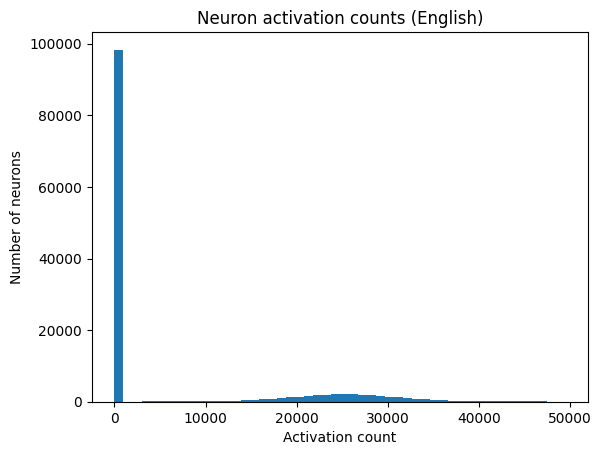

In [10]:
import torch
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Load the activation file
# -------------------------------
activation_path = "/content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/activation.en.train.small.llama3b.pt"
data = torch.load(activation_path)

print("Keys in file:", data.keys())

# -------------------------------
# Step 2: Inspect shape
# -------------------------------
over_zero = data['over_zero']
print("Shape of over_zero:", over_zero.shape)

# -------------------------------
# Step 3: Inspect values
# -------------------------------
print("Min activation count:", over_zero.min().item())
print("Max activation count:", over_zero.max().item())
print("First 10 neurons of first layer:", over_zero[0, :10])

# -------------------------------
# Step 4: Total activations
# -------------------------------
total_activations = over_zero.sum().item()
print("Total positive activations:", total_activations)

# -------------------------------
# Step 5: Optional - visualize distribution
# -------------------------------
plt.hist(over_zero.flatten().cpu().numpy(), bins=50)
plt.title("Neuron activation counts (English)")
plt.xlabel("Activation count")
plt.ylabel("Number of neurons")
plt.show()


Keys in file: dict_keys(['over_zero'])
Shape of over_zero: torch.Size([16, 8192])
Min activation count: 0
Max activation count: 98702
First 10 neurons of first layer: tensor([34919, 68237, 38716, 46895, 43828, 47525, 56060, 48203, 65870, 62665],
       dtype=torch.int32)
Total positive activations: 1647573274


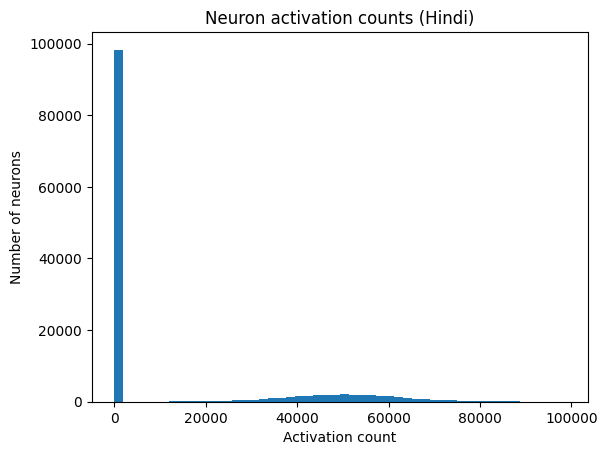

In [11]:


# -------------------------------
# Step 1: Load the activation file
# -------------------------------
activation_path = "/content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data/activation.hi.train.small.llama3b.pt"
data = torch.load(activation_path)

print("Keys in file:", data.keys())

# -------------------------------
# Step 2: Inspect shape
# -------------------------------
over_zero = data['over_zero']
print("Shape of over_zero:", over_zero.shape)

# -------------------------------
# Step 3: Inspect values
# -------------------------------
print("Min activation count:", over_zero.min().item())
print("Max activation count:", over_zero.max().item())
print("First 10 neurons of first layer:", over_zero[0, :10])

# -------------------------------
# Step 4: Total activations
# -------------------------------
total_activations = over_zero.sum().item()
print("Total positive activations:", total_activations)

# -------------------------------
# Step 5: Optional - visualize distribution
# -------------------------------
plt.hist(over_zero.flatten().cpu().numpy(), bins=50)
plt.title("Neuron activation counts (Hindi)")
plt.xlabel("Activation count")
plt.ylabel("Number of neurons")
plt.show()


In [12]:
import torch
import os

# ======== CONFIG ========
MODEL_NAME = "llama3b"  # or "llama3.2-1b"
DATA_DIR = "/content/drive/MyDrive/Colab_Projects/Language-Specific-Neurons/data"
LANGS = ["en", "hi"]
FILES = [f"activation.{lang}.train.small.{MODEL_NAME}.pt" for lang in LANGS]

# ======== LOAD DATA ========
over_zero = []
n_values = []

print("🔹 Loading activation data...")
for f in FILES:
    path = os.path.join(DATA_DIR, f)
    data = torch.load(path, map_location="cpu")
    if "over_zero" not in data:
        raise KeyError(f"'over_zero' missing in {f}")
    over_zero.append(data["over_zero"].float())
    n_values.append(torch.tensor(49475.0))  # total tokens seen (adjust if different)
    print(f"  Loaded {f} → shape {data['over_zero'].shape}")

over_zero = torch.stack(over_zero, dim=-1)  # [layers, neurons, langs]
n = torch.stack(n_values, dim=-1)

num_layers, hidden_size, lang_count = over_zero.size()
print(f"\n✅ Tensor shape: {over_zero.shape} (Layers={num_layers}, Neurons={hidden_size}, Langs={lang_count})")

# ======== CALCULATE ACTIVATION PROBABILITIES ========
activation_probs = over_zero / n  # normalized activation frequency
activation_probs = torch.nan_to_num(activation_probs, nan=0.0)

# ======== ANALYSIS ========
threshold_ratio = 0.95  # Top 5% neurons considered "highly active"
flat = activation_probs.flatten()
cutoff = flat.kthvalue(int(len(flat) * threshold_ratio)).values.item()

specific_neurons = {lang: [[] for _ in range(num_layers)] for lang in LANGS}
shared_neurons = [[] for _ in range(num_layers)]

print(f"\n🔍 Cutoff for high activation = {cutoff:.6f}")

for layer in range(num_layers):
    layer_data = activation_probs[layer]  # [hidden, langs]
    hi_active = (layer_data[:, 1] > cutoff)
    en_active = (layer_data[:, 0] > cutoff)

    hi_only = hi_active & ~en_active
    en_only = en_active & ~hi_active
    both = hi_active & en_active

    specific_neurons["hi"][layer] = hi_only.nonzero(as_tuple=True)[0].tolist()
    specific_neurons["en"][layer] = en_only.nonzero(as_tuple=True)[0].tolist()
    shared_neurons[layer] = both.nonzero(as_tuple=True)[0].tolist()

    print(f"\nLayer {layer:02d}:")
    print(f"  English-specific: {len(specific_neurons['en'][layer])}")
    print(f"  Hindi-specific:   {len(specific_neurons['hi'][layer])}")
    print(f"  Shared neurons:   {len(shared_neurons[layer])}")

# ======== SAVE RESULTS ========
SAVE_PATH = os.path.join(DATA_DIR, f"activation_mask_{MODEL_NAME}_en_hi.pt")
torch.save({
    "specific_neurons": specific_neurons,
    "shared_neurons": shared_neurons
}, SAVE_PATH)

print(f"\n✅ Saved analysis results to {SAVE_PATH}")
print("You can visualize or further analyze these later.")


🔹 Loading activation data...
  Loaded activation.en.train.small.llama3b.pt → shape torch.Size([16, 8192])
  Loaded activation.hi.train.small.llama3b.pt → shape torch.Size([16, 8192])

✅ Tensor shape: torch.Size([16, 8192, 2]) (Layers=16, Neurons=8192, Langs=2)

🔍 Cutoff for high activation = 1.081112

Layer 00:
  English-specific: 0
  Hindi-specific:   855
  Shared neurons:   0

Layer 01:
  English-specific: 0
  Hindi-specific:   840
  Shared neurons:   0

Layer 02:
  English-specific: 0
  Hindi-specific:   781
  Shared neurons:   0

Layer 03:
  English-specific: 0
  Hindi-specific:   837
  Shared neurons:   0

Layer 04:
  English-specific: 0
  Hindi-specific:   865
  Shared neurons:   0

Layer 05:
  English-specific: 0
  Hindi-specific:   841
  Shared neurons:   0

Layer 06:
  English-specific: 0
  Hindi-specific:   793
  Shared neurons:   0

Layer 07:
  English-specific: 0
  Hindi-specific:   781
  Shared neurons:   0

Layer 08:
  English-specific: 0
  Hindi-specific:   796
  Shared 